# Genome Wide Association Study (GWAS)


**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt

In [7]:
# Load the data into a Pandas dataframe from CSV
data = pd.read_csv("1002059166.csv")


**TASK 1.2 Fisher's Exact Test, Calculate the p-value for each SNP using Fisher's Exact Test** 

In [8]:

# Initialize lists to store results
p_values = []
significant = []

for index, row in data.iterrows():
    oddsratio, p_value = fisher_exact([[row['Case_Num_C_Allele'], row['Case_Num_T_Allele']], 
                                       [row['Control_Num_C_Allele'], row['Control_Num_T_Allele']]])
    p_values.append(p_value)
    

# Store the results in a new dataframe
results = pd.DataFrame({'SNP': data['SNP'], 'P_value': p_values})

# Determine which SNPs are statistically significant using the original p-value threshold
results['Significant'] = results['P_value'] < 5e-8


num_significant = results[results["Significant"] == True].shape[0]

# Print the number of significant SNPs
print("Number of significant SNPs:", num_significant)
print("\n")


# Save the results to a csv file
results.to_csv("results.csv", index=False)

# When writing this homework assignment, I did not recall how to open CSV, so refered the code from the website 
# https://docs.python.org/3/library/csv.html
# Just to crosscheck the results
import csv
with open('results.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

Number of significant SNPs: 343


['SNP', 'P_value', 'Significant']
['snp0', '4.791712597192231e-13', 'True']
['snp1', '4.6289717184143334e-08', 'True']
['snp2', '2.7468930788726465e-24', 'True']
['snp3', '0.0795117768141094', 'False']
['snp4', '1.2745475031946934e-06', 'False']
['snp5', '0.26925978175065757', 'False']
['snp6', '5.490833603385065e-06', 'False']
['snp7', '0.01547251246338294', 'False']
['snp8', '8.493989623773284e-05', 'False']
['snp9', '2.160245661867921e-05', 'False']
['snp10', '5.154594471731909e-07', 'False']
['snp11', '1.0814284825683396e-05', 'False']
['snp12', '1.0', 'False']
['snp13', '0.019312411588304712', 'False']
['snp14', '1.5051083818269576e-06', 'False']
['snp15', '3.5559760519377717e-06', 'False']
['snp16', '3.109333872226138e-10', 'True']
['snp17', '0.0027038782157665607', 'False']
['snp18', '0.01982414356893598', 'False']
['snp19', '8.745274934137824e-22', 'True']
['snp20', '1.0', 'False']
['snp21', '3.64300887069644e-26', 'True']
['snp22', '0.05778754


**TASK 1.3 Corrected P-Values**


In [9]:
#Calculate the Bonferroni-corrected p-value
bonferroni_threshold = 5e-8 / len(results)
results['Significant_Corrected'] = results['P_value'] < bonferroni_threshold


# Calculate the corrected p-value threshold
N = len(results)
corrected_threshold = 5 * 10**-8 / N
print("Bonferroni-corrected p-value:",corrected_threshold)


# Find the number of significant SNPs under the corrected p-value
significant_snps = sum(results['Significant_Corrected'])
print("Number of significant SNPs under the corrected p-value: ", significant_snps)
print("\n")


# Update the results to a csv file
results.to_csv("results.csv", index=False)


# When writing this homework assignment, I did not recall how to open CSV, so refered the code from the website 
# https://docs.python.org/3/library/csv.html

# Just to crosscheck the results
import csv
with open('results.csv', newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

Bonferroni-corrected p-value: 4.9999999999999995e-11
Number of significant SNPs under the corrected p-value:  237


['SNP', 'P_value', 'Significant', 'Significant_Corrected']
['snp0', '4.791712597192231e-13', 'True', 'True']
['snp1', '4.6289717184143334e-08', 'True', 'False']
['snp2', '2.7468930788726465e-24', 'True', 'True']
['snp3', '0.0795117768141094', 'False', 'False']
['snp4', '1.2745475031946934e-06', 'False', 'False']
['snp5', '0.26925978175065757', 'False', 'False']
['snp6', '5.490833603385065e-06', 'False', 'False']
['snp7', '0.01547251246338294', 'False', 'False']
['snp8', '8.493989623773284e-05', 'False', 'False']
['snp9', '2.160245661867921e-05', 'False', 'False']
['snp10', '5.154594471731909e-07', 'False', 'False']
['snp11', '1.0814284825683396e-05', 'False', 'False']
['snp12', '1.0', 'False', 'False']
['snp13', '0.019312411588304712', 'False', 'False']
['snp14', '1.5051083818269576e-06', 'False', 'False']
['snp15', '3.5559760519377717e-06', 'False', 'False']
['snp16', '3


**TASK 1.4 Manhattan Plots**

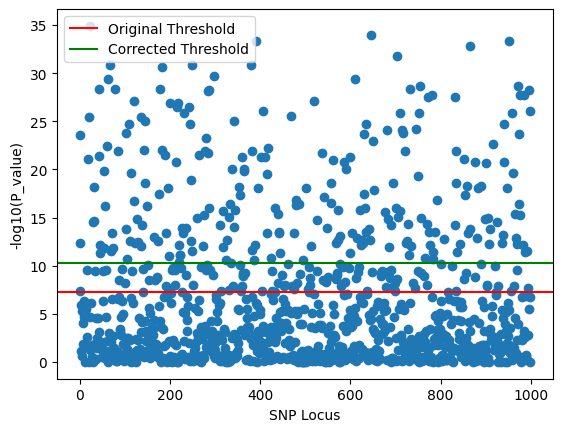

In [10]:
# Plot the -log10(p-value) for each SNP
plt.scatter(np.arange(len(results)), -np.log10(results['P_value']))

# Add labels for the x and y axes
plt.xlabel('SNP Locus')
plt.ylabel('-log10(P_value)')

# Add the original and corrected p-value threshold lines to the plot
original_threshold = -np.log10(5e-8)
plt.axhline(y=original_threshold, color='red', label='Original Threshold')
corrected_threshold = -np.log10(bonferroni_threshold)
plt.axhline(y=corrected_threshold, color='green', label='Corrected Threshold')

# Adding a legend to distinguish the two threshold lines
plt.legend()

# Show the plot
plt.show()


**Referred to some websites to write the documentation in latex**

In [11]:
#When writing this homework assignment, I did not recall how to insert code in a nice looking way into LaTeX documents,
# so I referred to this page on stackoverflow for help and https://icl.utk.edu/~mgates3/docs/latex.pdf
